# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

<ipython-input-4-85cd13fd6325>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')


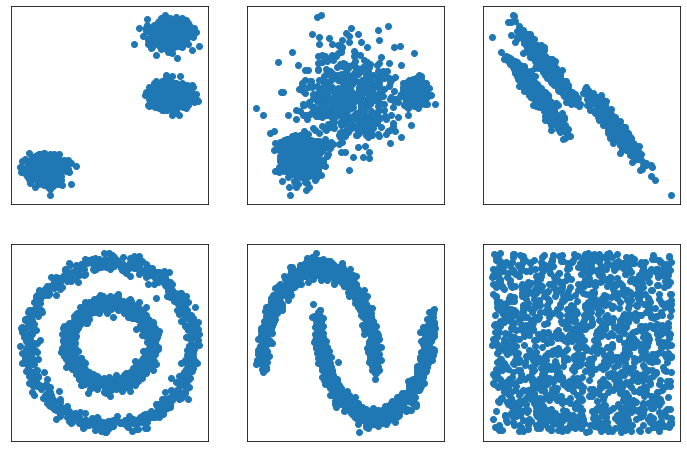

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

<ipython-input-6-beef10febff4>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = k_means.labels_.astype(np.int)
<ipython-input-6-beef10febff4>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
<ipython-input-6-beef10febff4>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. Whe

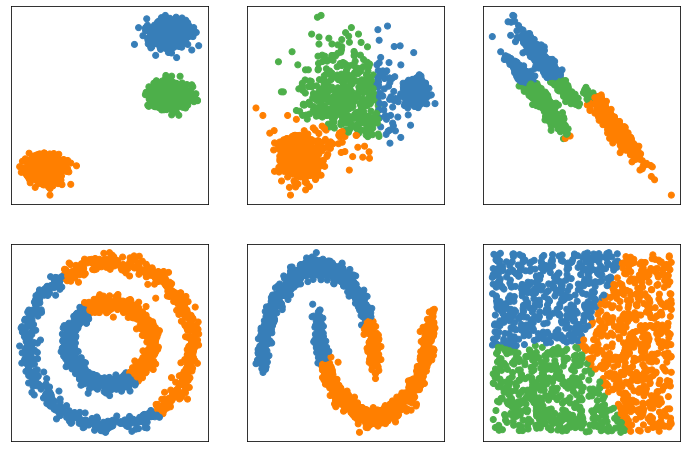

In [6]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

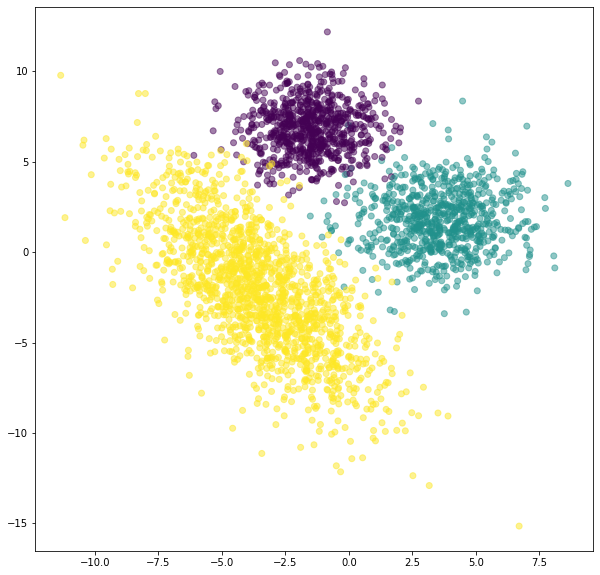

In [8]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [9]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [14]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)

In [15]:
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [20]:
k_means.cluster_centers_.round(0)

array([[-3., -3.],
       [-2.,  6.],
       [ 4.,  2.]])

In [17]:
k_means.labels_

array([2, 2, 1, ..., 0, 0, 0])

In [21]:
from collections import Counter

In [22]:
Counter(k_means.labels_)

Counter({2: 742, 1: 938, 0: 1320})

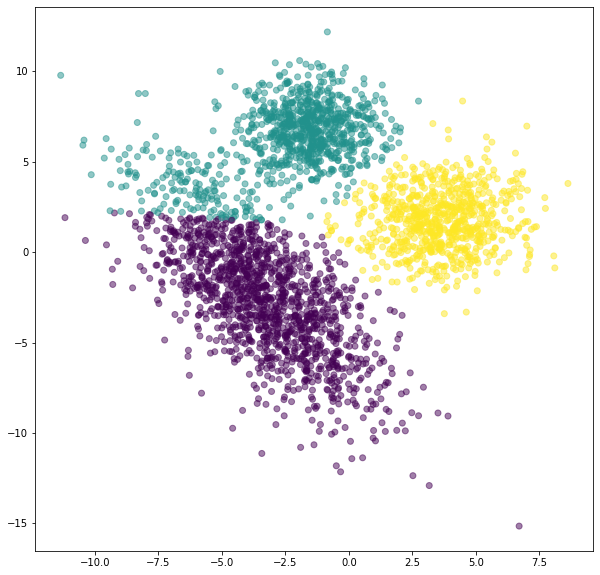

In [23]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [48]:
import pandas as pd

df = pd.read_csv('../Data/snsdata.csv')
data = df.loc[:, 'basketball':]

In [50]:
data.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [56]:
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data), columns = data.columns)
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(data)

KMeans(n_clusters=9, random_state=123)

In [57]:
y_pred = k_means.labels_.astype(int)
Counter(y_pred)

Counter({3: 19110,
         0: 1041,
         6: 6572,
         4: 571,
         5: 1124,
         8: 855,
         2: 724,
         7: 2,
         1: 1})

In [58]:
data_scaled['cluster_label'] = y_pred

In [59]:
for k, group in data_scaled.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
hair       3.439426
kissed     2.105892
sex        2.035842
drugs      1.546057
rock       1.393111
music      1.332306
clothes    1.252843
die        1.058823
drunk      1.023936
sports     0.848911
dtype: float64
1
blonde      168.307291
sex          19.395543
drunk        14.812744
death        13.475099
hair         10.544693
die           9.312807
god           7.098477
dress         4.203186
football      2.477795
clothes       1.801613
dtype: float64
2
soccer        5.066884
sports        0.365523
shopping      0.275389
football      0.245432
basketball    0.241076
swimming      0.146127
tennis        0.119620
church        0.113157
hollister     0.105218
volleyball    0.100087
dtype: float64
3
blonde         -0.029464
tennis         -0.039573
cheerleading   -0.050237
bible          -0.051571
baseball       -0.053488
sexy           -0.056007
drunk          -0.068970
abercrombie    -0.070532
hollister      -0.077284
jesus          -0.078497
dtype: float64
4
god        4.600333


In [61]:
data_scaled.groupby('cluster_label').basketball.count()

cluster_label
0     1041
1        1
2      724
3    19110
4      571
5     1124
6     6572
7        2
8      855
Name: basketball, dtype: int64

# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [7]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

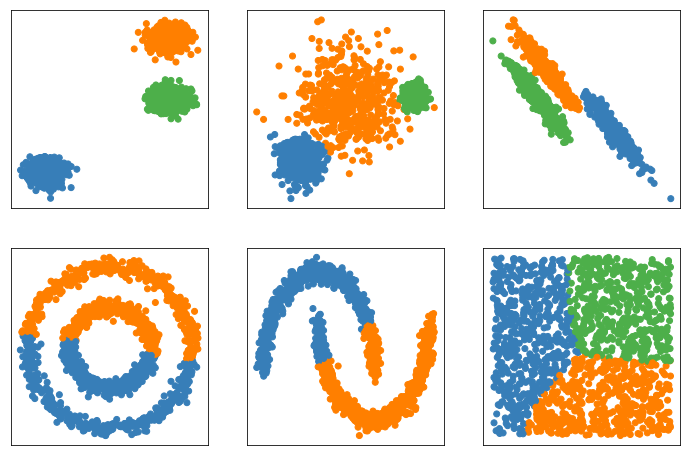

In [28]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

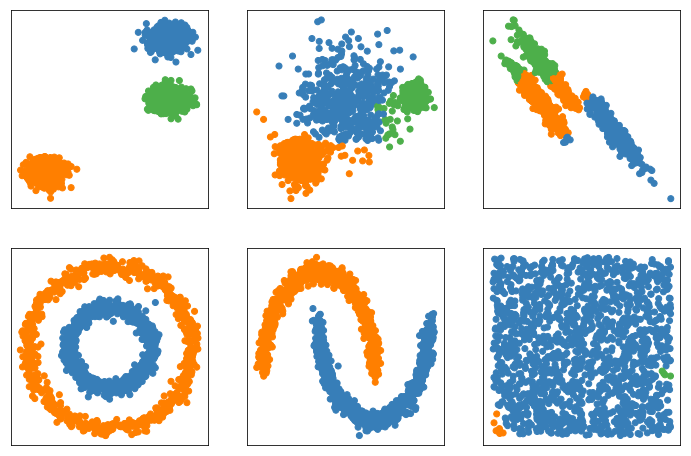

In [30]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

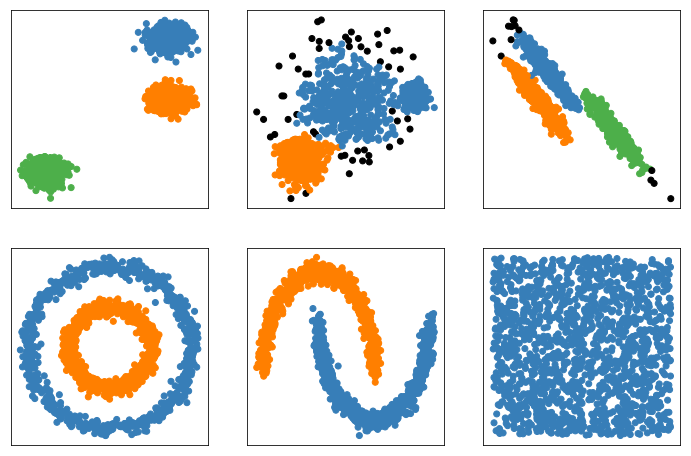

In [32]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])